## 05-WCS clients

<a href="./04-WCS_access.ipynb"><< 04-How to develop and test WCS queries?</a>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space> <a href="./06-Data.ipynb">06-What data is available at ECMWF's WCS?>></a>

The [first part](./01-OGC_WCS.ipynb#webservice) of this tutorial gave an introduction to the principical setup of a webservice and the need of a client (desktop- or web-based) that benefits from the web service. In principle, if a data provider (e.g. ECMWF) offers on-demand data access and processing with the help of a WC(P)S protocol, the data can be used in multiple ways:  
> * a <b>scientist</b> can integrate efficient data retrieval via WC(P)S directly into her processing routine, 
* a <b>developer</b> can integrate the WC(P)S query in an interactive web-application with one of the numerous JavaScript mapping libraries or   
* a <b>GIS specialist</b> can directly access and open the data within QGIS for further spatial analysis without downloading the data.  

We present you three different ways how to access, process and retrieve or integrate data requested from a WCS server:
- [Build web-applications with WC(P)S requests - NASA WebWorldWind example](#nasa_www)
- [Integrate WC(P)S into your GIS workflow - QGIS example](#qgis)
- [Integrate a WC(P)S request into your data processing routine - Python example](#python)

***

### <a id='nasa_www'></a>Build web-applications

In the framework of [EarthServer-2](http://earthserver.eu), ECMWF is the Climate Science Data provider. A customized demo web-client has been developed that visualises ERA-interim reanalysis data with the help of [NASA WebWorldWind](http://webworldwind.org), a three-dimensional virtual globe JavaScript API for web visualisations.

The custom-built web client gives currently access to three datasets (1) available at the WCS server: 
* <b>2 metre air temperature</b> (<i>temp2m</i>), 
* <b>total accumulated precipitation</b> (<i>precipitation</i>), and 
* <b>GloFAS river discharge forecast data</b> (<i>river_discharge_forecast_opt2</i>).  

The portal allows for the display of two-dimensional global datasets or a subset thereof (2).  
An additional plotting functionality (3) allows the retrieval of data points in time of individual latitude / longitude point values. One plotting functionality allows for the plotting of ERA-interim time-series data and the other plotting routine uses Python's library matplotlib for plotting a hydrograp based on river-discharge forecast data.

The web client can be accessed via http://earthserver.ecmwf.int/earthserver/worldwind.

<img src="img/www_portal.png" width="800">
<center><i>Demo web-client with <a href="https://webworldwind.org/">NASA WebWorldWind</a>. The web-client offers three main functionalities: (1) three dimensional visualisation of three global coverages, (2) executing own WCPS queries and visualize only a subset of a coverage (compare inlet) and (3) a plotting functionality of a time-series / hydrograph of individual latitude / longitude information.</i></center>

<img src="img/celery_services.png" width="800">
<center><i>Examples of the two plotting services offered by the demo web client. The main image shows a hydrograph plotted based on daily river discharge forecast data. The plotting is done with Pythons's plotting library matplotlib. The inlet shows the plotting service for ERA-interim time series data. The plot shows total accumulated precipitation for one lat/lon grid point for 1 year. The plot is generated by ECMWF's plotting library Magics.</i></center>

***

### <a id='qgis'></a>Integrate WC(P)S into your GIS workflow

[QGIS](http://www.qgis.org/en/site/) is a poplular open-source desktop-based Geographical Information System that bases on the collaboration and development of people within the geospatial data community. Based on individual plugins, QGIS can be enriched with a wide range of additional functionalities.  

Per default, QGIS can be used as a WCS 1.1.1.1 compliant data server. ECMWF's WCS server is compliant to WCS 2.0 and gladly, there is a QGIS plugin that can be installed to be also compliant to WCS 2.0.
Thapaliya & Misev (2014) built the <a href="https://plugins.qgis.org/plugins/QgsWcpsClient1/">QgsWcpsClient1</a> plugin, which allows to connect to a OGC WC(P)S server and to execute a WCPS query for direct import to QGIS. Figure below shows an example of a WCPS query executed in QGIS to retrieve sea surface temperature data from ECMWF for 31 December 2001.

<img src="img/qgis_workflow.png" width="800">
<center><i>The QGIS desktop application and a simple three step approach to request data via a WCPS query: (1) install and load the <a href="https://plugins.qgis.org/plugins/QgsWcpsClient1/">QgsWcpsClient1</a> plugin, (2) connect to a WCS server endpoint and (3) request data with a WCPS query.</i></center>

A connection can be made either to ECMWF's service endpoint or to any other WCS 2.0 server. Once the connection is established, data on the server can be accessed via a WCPS query. Figure below shows (1) data from the Plymouth Marine Laboratory, the the marine science data provider of EarthServer-2 and (2) ERA-interim sea surface temperature from ECMWF.

<img src="img/qgis_data.png" width="800">
<center><i>Two examples of a coverage requested and retrieved via a WCPS query and visualized on-the-fly with QGIS: (1) from Plymouth Marine Laboratory's web service and (2) from ECMWF's webservice. (1) shows the ocean colour from ESA's Climate Change Initiative for 31 December 2001. (2) shows the ERA-interim sea surface temperature for 31 December 2010.</i></center>

***

### <a id='python'></a>Integrate a WC(P)S request into your data processing routine

Rather than downloading Gigabytes to Terrabytes of data, one can simply integrate data access, processing and retrieval into any processing routine.

The example below shows a simple and quick example in Python how ERA-interim 2m air temperature data can be requested from ECMWF's WCS server and directly stored python data structures, e.g a numpy-array of a python-list. This allows for further data processing or data visualisation.

In [3]:
# Load required libraries
%matplotlib inline
import requests
import numpy as np
import os
import matplotlib.pyplot as plt

Format of a Web Coverage Processing Service query - Example for a 2m air temperature spatial and temporal subsetting as well as a mathematical conversion, to convert Kelvin to degrees Celsius.

In [4]:
url_fmt = 'http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1' \
          '&request=ProcessCoverages' \
          '&query=for c in (%s) return encode(c[Lat(%s), Long(%s), ansi("%s":"%s")] - 273.15, "csv") '

Add your parameters into the customized url format.

In [5]:
url = url_fmt%("temp2m", 51, -1, "2000-01-01T00:00:00+00:00","2005-12-31T00:00:00+00:00")

Store the data information in a python numpy array (x) or a simple list (y) for further processing

In [6]:
r= requests.get(url,
                proxies={'http':None}
                )

r.raise_for_status()

# Store the requested data in a numpy array
x = np.array(eval(r.text.replace('{','[').replace('}',']')))

# Store the requested data in a python list
y = [float(a) for a in r.text[1:-1].split(",")]

In [12]:
# Example of a numerical output
x

array([ 8.46833,  8.51617,  9.34429, ...,  5.85497,  8.99085,  7.42964])

Example of a simple and quick plot of the requested time-series

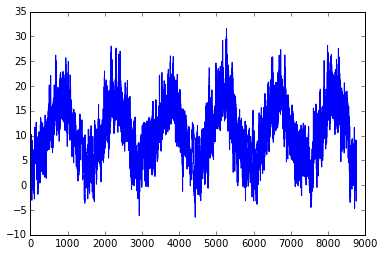

In [13]:
plt.plot(y)
plt.show()

***

The [next tutorial chapter](./06-Data.ipynb) will give you an overview of available data sets that can be retrieved from ECMWF's Web Coverage Service.

***

&copy; 2017 ECMWF

This software is licensed under the terms of the Apache Licence Version 2.0 which can be obtained at http://www.apache.org/licenses/LICENSE-2.0. In applying this licence, ECMWF does not waive the privileges and immunities granted to it by virtue of its status as an intergovernmental organisation nor
does it submit to any jurisdiction.